In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import missingno as msno
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Normalise_df.csv')
df = df.drop(['Unnamed: 0', 'ID'], axis = 1)

In [3]:
df.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


## Предобработка по пустым значениям не требуется

<AxesSubplot:>

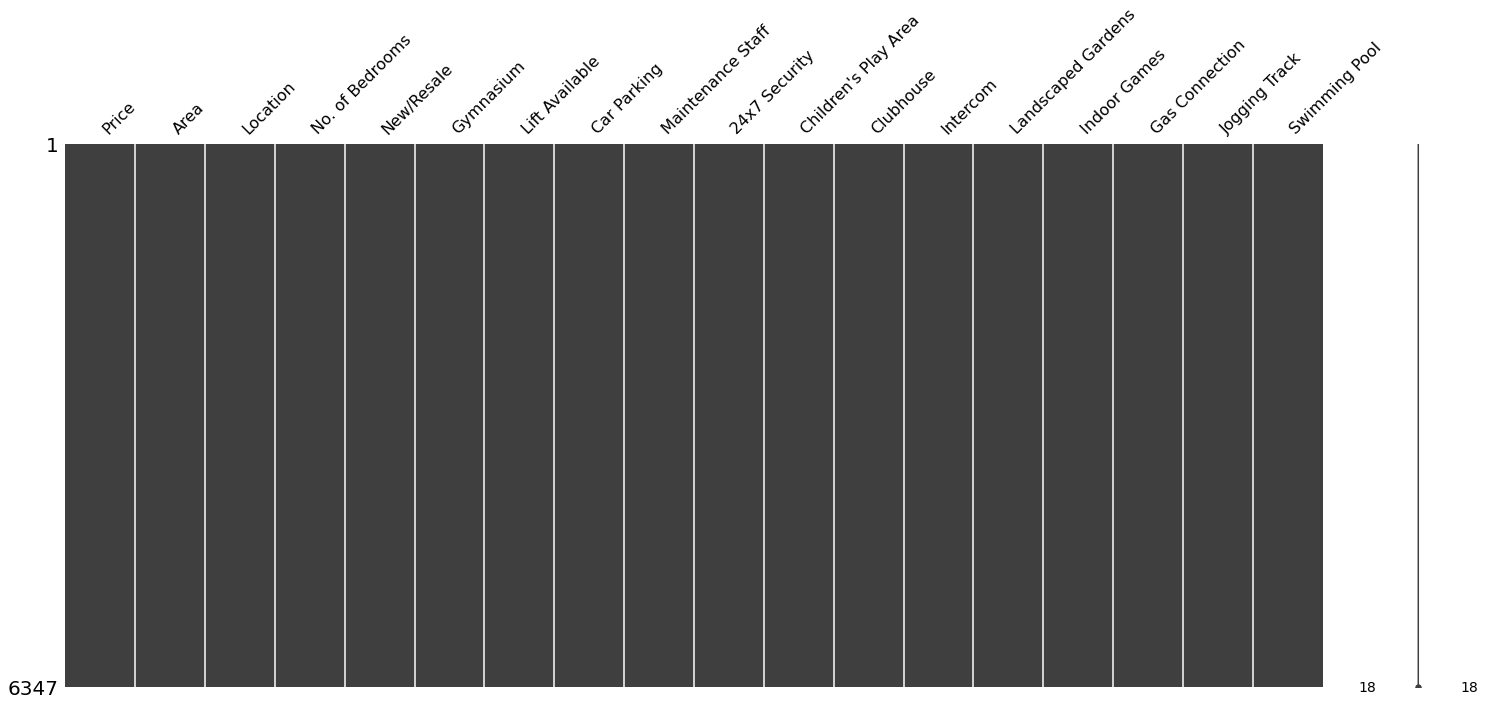

In [4]:
msno.matrix(df)

Text(0.5, 1.0, 'Топ 20 районов по кол-ву домов')

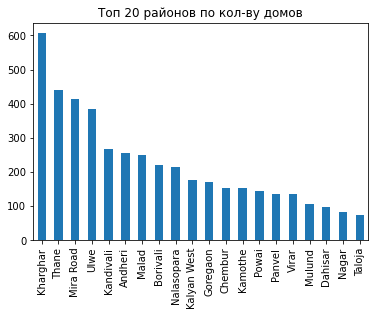

In [5]:
location = df['Location'].value_counts().head(20)
location.plot.bar()
plt.title("Топ 20 районов по кол-ву домов")

In [6]:
#выборка топ 4 отдельных районов
most_df = df.loc[(df["Location"] == "Kharghar")| (df["Location"] == "Thane")
               | (df["Location"] == "Mira Road")|(df["Location"] == "Ulwe")]
most_num = most_df.shape[0]
print('Количество домов в Kharghar, Thane West, Mira Road East и Ulwe :',most_num,
     '\nПроцент охватываемых домов', most_df.shape[0]/df.shape[0]*100)

Количество домов в Kharghar, Thane West, Mira Road East и Ulwe : 1846 
Процент охватываемых домов 29.084606900898063


Text(0.5, 1.0, '   Зависимость цены от площади в выборке')

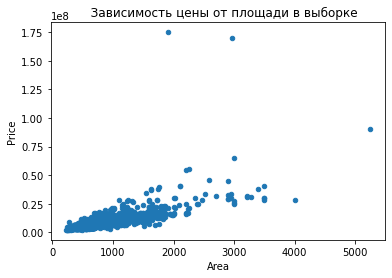

In [7]:
most_df.plot(x = 'Area', y = 'Price', kind = 'scatter')
plt.title("   Зависимость цены от площади в выборке")

In [8]:
#функция вывода столбиковой дианграмм для характеристик домов
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 3]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 300, facecolor = 'w', edgecolor = 'k')
    for i in range(1, min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.title(f'{columnNames[i]}')
        plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(most_df, 14, 5)

<ipython-input-8-517226f4c231>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i)


# Гипотеза 1: Чем лучше уровень инфрастукруры около дома, тем выше цена, причем зависимость цены от площади линейная

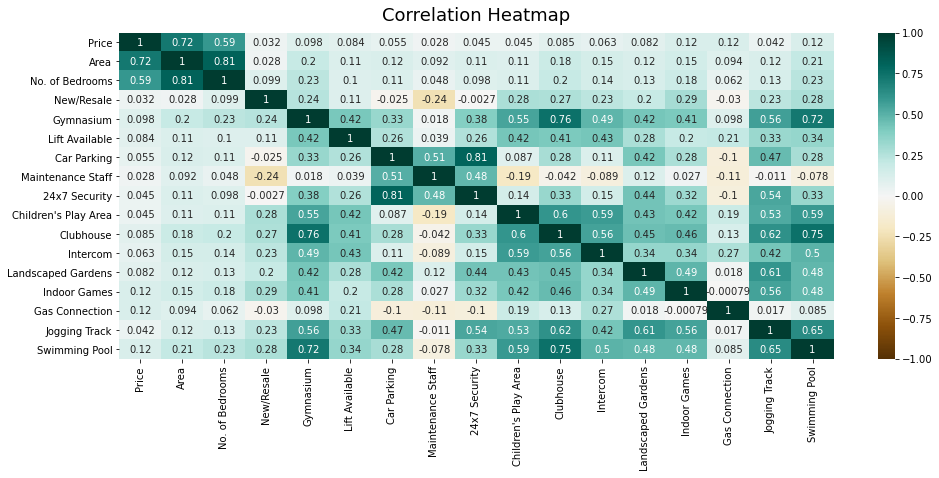

In [9]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

## По корреляционной матрице видно, что цена наибольшим образом зависит от площади и кол-ва комнат
Посмотрим зависимость Price от Area, предполодительно она линейная

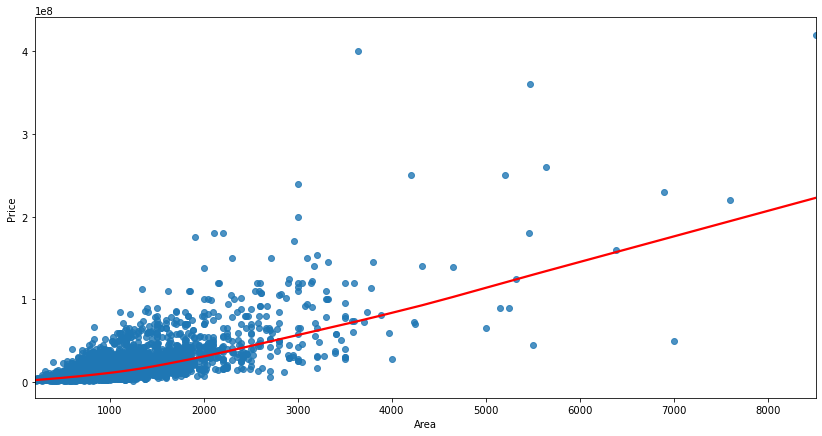

In [10]:
f, ax = plt.subplots(figsize=(14, 7))

sns.regplot(x=df["Area"], y=df["Price"], line_kws={"color":"r"},
           lowess=True)
plt.show()

<AxesSubplot:xlabel='Area', ylabel='Price'>

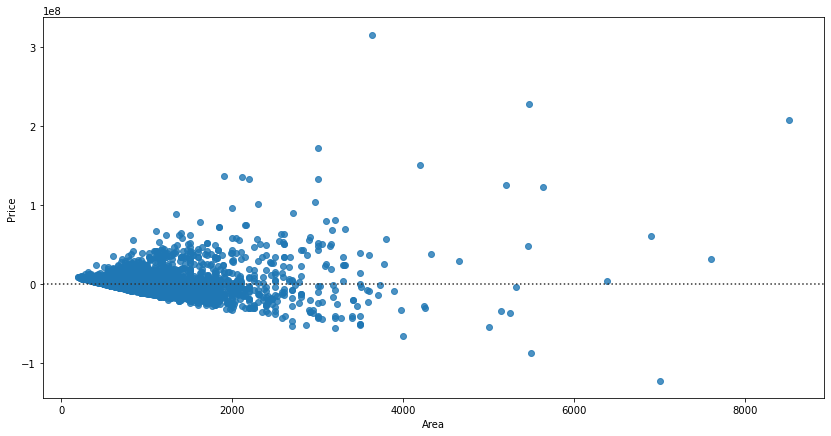

In [11]:
f, ax = plt.subplots(figsize=(14, 7))

sns.residplot(x=df["Area"], y=df["Price"])

## Вывод: Цена дома имеет линейную зависимость от площади

# Гипотеза 2: Район Worli является элитным районом, т.е. большинство домов имеют рядом школы, постоянную охрану и пр.

## Посмотрим соотношение домов с различными характеристиками

In [12]:
worli_df = df.loc[df["Location"] == 'Worli']
worli_df = worli_df.drop(['Price', 'Area', 'No. of Bedrooms', 'Location', 'New/Resale'], axis = 1)
worli_df.head()

,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
267,0,1,1,0,1,0,0,0,1,0,0,0,1
529,1,1,1,1,1,1,1,1,1,1,1,1,1
540,1,1,1,1,1,1,1,1,1,1,0,1,1
766,1,1,1,0,1,0,1,1,1,0,0,1,1
798,0,1,1,1,1,0,0,0,0,0,0,0,0


In [13]:
gymnasium_data = {g: worli_df["Gymnasium"].to_list().count(g) for g in set(worli_df["Gymnasium"])}
lift_data = {g: worli_df["Lift Available"].to_list().count(g) for g in set(worli_df["Lift Available"])}
parking_data = {g: worli_df["Car Parking"].to_list().count(g) for g in set(worli_df["Car Parking"])}
staff_data = {g: worli_df["Maintenance Staff"].to_list().count(g) for g in set(worli_df["Maintenance Staff"])}
security_data = {g: worli_df["24x7 Security"].to_list().count(g) for g in set(worli_df["24x7 Security"])}
playarea_data = {g: worli_df["Children's Play Area"].to_list().count(g) for g in set(worli_df["Children's Play Area"])}
clubhouse_data = {g: worli_df["Clubhouse"].to_list().count(g) for g in set(worli_df["Clubhouse"])}
intercom_data = {g: worli_df["Intercom"].to_list().count(g) for g in set(worli_df["Intercom"])}
gardens_data = {g: worli_df["Landscaped Gardens"].to_list().count(g) for g in set(worli_df["Landscaped Gardens"])}
games_data = {g: worli_df["Indoor Games"].to_list().count(g) for g in set(worli_df["Indoor Games"])}
gas_data = {g: worli_df["Gas Connection"].to_list().count(g) for g in set(worli_df["Gas Connection"])}
track_data = {g: worli_df["Jogging Track"].to_list().count(g) for g in set(worli_df["Jogging Track"])}
pool_data = {g: worli_df["Swimming Pool"].to_list().count(g) for g in set(worli_df["Swimming Pool"])}

In [14]:
gymnasium_df = pd.DataFrame.from_dict(gymnasium_data, orient='index',columns=['Gymnasium'])
lift_df = pd.DataFrame.from_dict(lift_data, orient='index',columns=['Lift Available'])
parking_df = pd.DataFrame.from_dict(parking_data, orient='index',columns=['Car Parking'])
staff_df = pd.DataFrame.from_dict(staff_data, orient='index',columns=['Maintenance Staff'])
security_df = pd.DataFrame.from_dict(security_data, orient='index',columns=['24x7 Security'])
playarea_df = pd.DataFrame.from_dict(playarea_data, orient='index',columns=['Children\'s Play Area'])
clubhouse_df = pd.DataFrame.from_dict(clubhouse_data, orient='index',columns=['Clubhouse'])
intercom_df = pd.DataFrame.from_dict(intercom_data, orient='index',columns=['Intercom'])
gardens_df = pd.DataFrame.from_dict(gardens_data, orient='index',columns=['Landscaped Gardens'])
games_df = pd.DataFrame.from_dict(games_data, orient='index',columns=['Indoor Games'])
gas_df = pd.DataFrame.from_dict(gas_data, orient='index',columns=['Gas Connection'])
track_df = pd.DataFrame.from_dict(track_data, orient='index',columns=['Jogging Track'])
pool_df = pd.DataFrame.from_dict(pool_data, orient='index',columns=['Swimming Pool'])

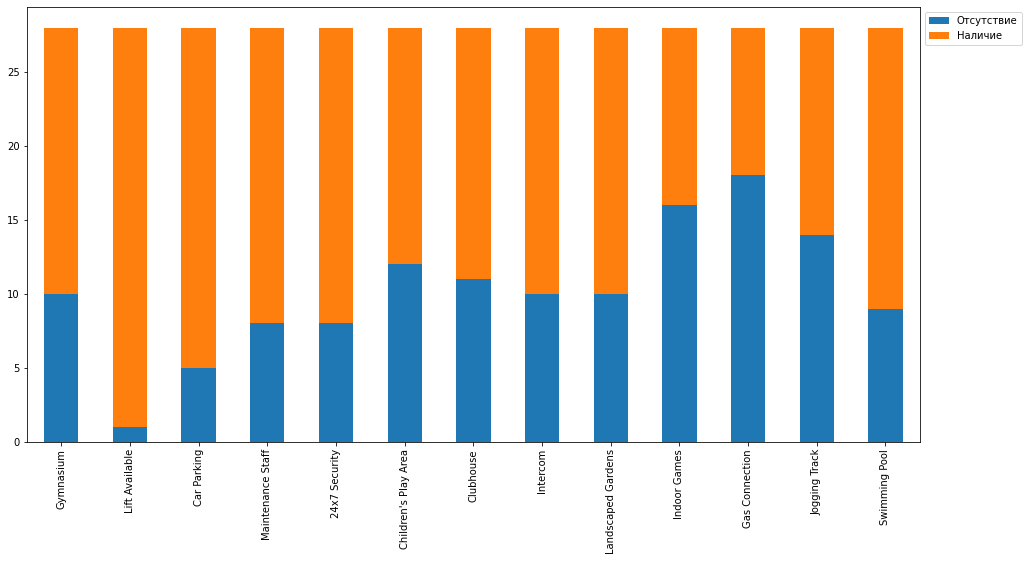

In [15]:
data = pd.concat([gymnasium_df, lift_df, parking_df,staff_df, security_df, playarea_df,
          clubhouse_df, intercom_df, gardens_df, games_df, gas_df,
           track_df, pool_df], sort = False, axis = 1).T
data.columns = ["Отсутствие", "Наличие"]
data.plot.bar(stacked=True, figsize=(16, 8))
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

## Видно, что много домов с бассейнами, паркингом и др. категориями
## Рассмотрим каждый дом по отдельности, т.к. их относительно немного

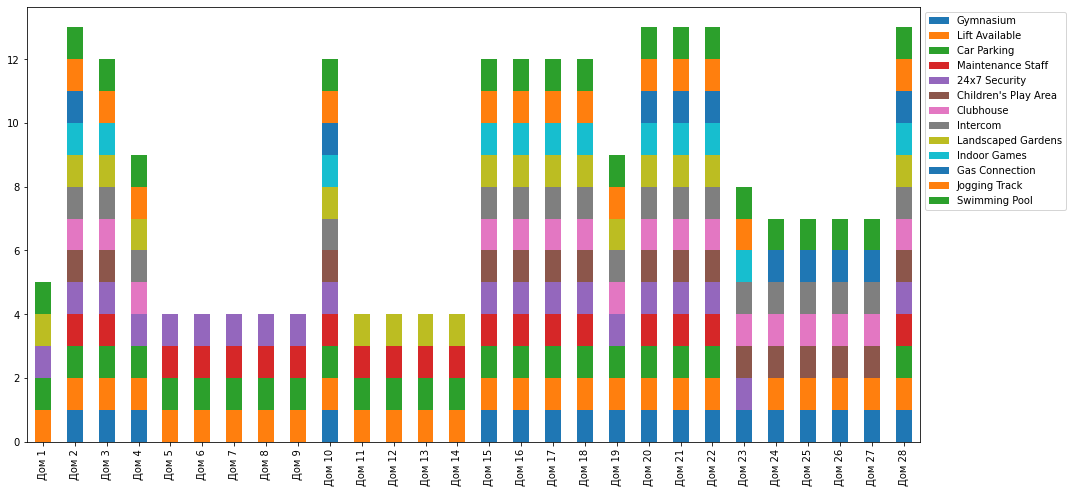

In [16]:
worli = pd.DataFrame({"Gymnasium": worli_df["Gymnasium"].to_list(),
                     "Lift Available": worli_df["Lift Available"].to_list(),
                     "Car Parking": worli_df["Car Parking"].to_list(),
                     "Maintenance Staff": worli_df["Maintenance Staff"].to_list(),
                     "24x7 Security": worli_df["24x7 Security"].to_list(),
                     "Children's Play Area": worli_df["Children's Play Area"].to_list(),
                     "Clubhouse": worli_df["Clubhouse"].to_list(),
                     "Intercom": worli_df["Intercom"].to_list(),
                     "Landscaped Gardens": worli_df["Landscaped Gardens"].to_list(),
                     "Indoor Games": worli_df["Indoor Games"].to_list(),
                     "Gas Connection": worli_df["Gas Connection"].to_list(),
                     "Jogging Track": worli_df["Jogging Track"].to_list(),
                     "Swimming Pool": worli_df["Swimming Pool"].to_list()})
worli.index = ["Дом 1","Дом 2","Дом 3","Дом 4","Дом 5","Дом 6","Дом 7","Дом 8","Дом 9",
              "Дом 10","Дом 11","Дом 12","Дом 13","Дом 14","Дом 15","Дом 16","Дом 17","Дом 18","Дом 19","Дом 20"
              ,"Дом 21","Дом 22","Дом 23","Дом 24","Дом 25","Дом 26","Дом 27","Дом 28"]
worli.plot.bar(stacked=True,
                  figsize=(16, 8));
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1,1))

## Вывод, район Worli можно считать элитным

# Гипотеза 3: Оптимальный дом находится в локации Kharghar

## Оптимальным домом называется дом с наименьшей ценой при наибольшей площади, т.е отношение Area/Price должно быть максимальным.  Также дом должен содердать наибольшее кол-вом характеристик, не считая кол-во комнат и газопровод

In [17]:
best_df = df.loc[(df["Gymnasium"] == 1) & (df["Lift Available"] == 1)
            & (df["Car Parking"] == 1) & (df["Maintenance Staff"] == 1) &
                 (df["24x7 Security"] == 1) & (df["Children's Play Area"] == 1)
                & (df["Clubhouse"] == 1)& (df["Intercom"] == 1)
                & (df["Landscaped Gardens"] == 1)& (df["Indoor Games"] == 1)
                & (df["Jogging Track"] == 1)& (df["Swimming Pool"] == 1)]

In [18]:
df["Attitude"] = df["Area"]/df["Price"]
df["Attitude"].max()

0.000626

In [19]:
best = best_df.copy()
best["Attitude"] = best_df["Area"]/best_df["Price"]
best["Attitude"].max()

0.00025714285714285715

In [20]:
thebest = best.loc[best["Attitude"] == best["Attitude"].max()]
the = df.loc[df["Attitude"] == df["Attitude"].max()]

In [21]:
thebest

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Attitude
654,3500000,900,Thane,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.000257


In [22]:
the

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Attitude
3477,2000000,1252,Naigaon East,1,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0.000626


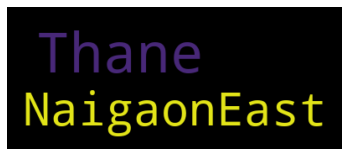

In [23]:
from wordcloud import WordCloud
text=("Thane Thane Thane NaigaonEast NaigaonEast")
 
# Create the wordcloud object
wordcloud = WordCloud(width=400, height=170).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Вывод, оптимальный дом, не находится в районе Kharghar
## Оптимальый дом с максимальыми удобствами находится в локации Thane
## Оптимальный дом исходя только из соотношения Area/Price находится в Naigaon East

# Гипотеза 4: В районе Byculla наибольшее количесвто перепродаваемых домов, потому что это криминальный район

In [42]:
byc_df = df.loc[df["Location"] == "Byculla"]

In [110]:
len(byc_df)

1

In [111]:
byc_df

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Attitude
6045,4500000,325,Byculla,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000072


## Вывод: проверка данной гипотезы оказывается затруднительной, из-за недостатка данных, т. е. она опровержена

# Гипотеза 5: Дома с наименьшей территорией расположены в Khaghar

In [89]:
sorted_df = df.sort_values("Area", ascending=False).tail(15)

In [90]:
sorted_df

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Attitude
1033,2100000,245,Mira Road,1,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0.000117
1935,2100000,245,Mira Road,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0.000117
2809,4900000,239,Thane,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0.000049
2521,3000000,225,Malad,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.000075
4386,5000000,225,Powai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000045
5304,2900000,225,Malad,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.000078
5305,2850000,225,Malad,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.000079
5317,2900000,225,Malad,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.000078
2522,2300000,225,Malad,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.000098
2520,2900000,220,Malad,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.000076


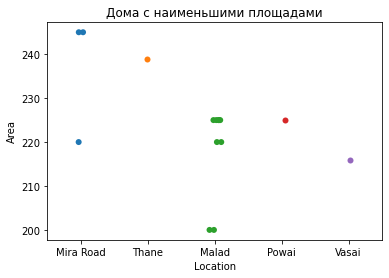

In [109]:
sns.stripplot(data =sorted_df, x="Location", y="Area", jitter=0.1, size=6)
plt.title('Дома с наименьшими площадами')
plt.show()

## Вывод: гипотеза не верна, т. к. выше видно, что дома с наименьшей территорией расположены в локации Malad